In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
train = pd.read_csv("/content/trainKNN.txt", index_col=0)
train.head()

,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10,Target
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train.drop('Target',axis=1))
Scaled = scaler.transform(train.drop('Target',axis=1))

In [74]:
scaledview = pd.DataFrame(Scaled,columns=train.columns[:-1])
scaledview.head()

,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10
0,-1.668687,-0.220113,0.659273,0.612722,-0.195821,0.118519,-0.062128,-0.760873,-0.340326,-0.585428
1,-1.652228,-0.689081,0.199452,0.576675,0.170756,0.460128,-0.196078,-0.796049,-0.340326,-0.585428
2,-1.635769,-0.203716,-0.209277,0.677607,-0.338379,-0.039147,0.071821,-0.486504,-0.340326,-0.585428
3,-1.619310,-0.282424,-0.132641,0.627141,-0.440206,0.578377,0.042055,-0.592031,-0.340326,-0.585428
4,-1.602851,-0.761230,-0.745735,0.619932,0.333679,0.433850,0.176004,-0.592031,-0.340326,2.427890


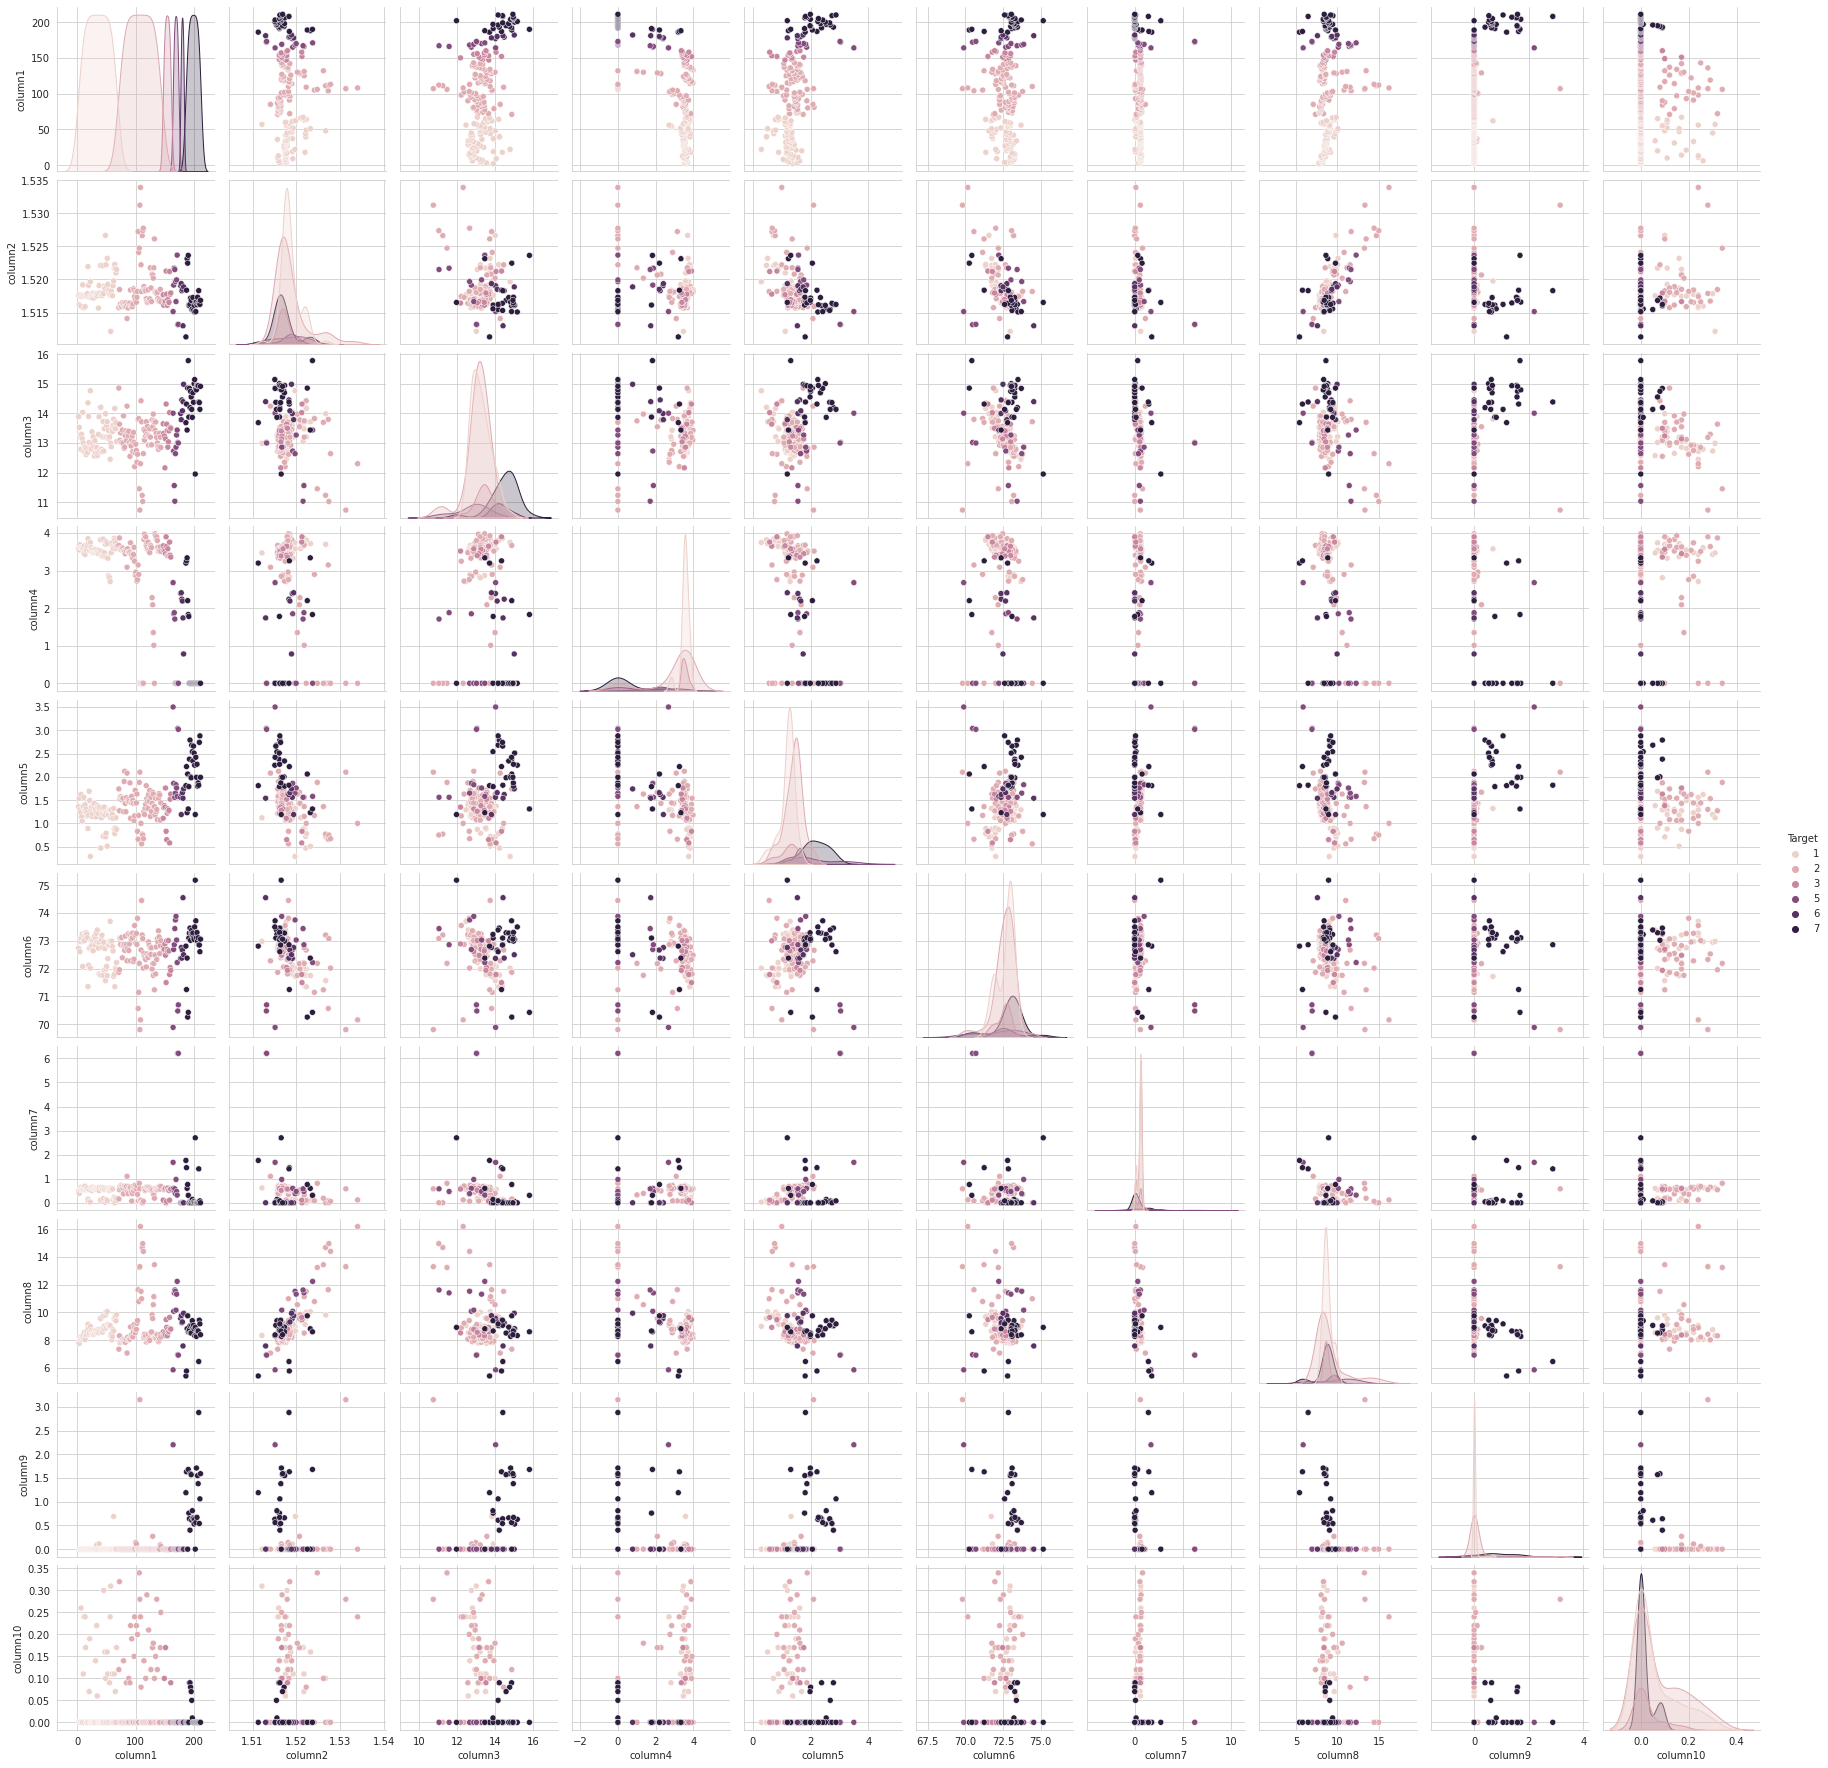

In [76]:
sns.pairplot(train,hue="Target")

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(Scaled,train['Target'],test_size=0.30)

In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [140]:
knn = KNeighborsClassifier(n_neighbors=1,metric="euclidean")

In [141]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [126]:
pred = knn.predict(X_test)

In [127]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [128]:
print(confusion_matrix(y_test,pred))

[[17  0  0  0  0  0]
 [ 0 21  0  0  0  0]
 [ 2  4  3  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  0  0]
 [ 0  1  0  0  1  6]]


In [129]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.89      1.00      0.94        17
           2       0.78      1.00      0.88        21
           3       1.00      0.33      0.50         9
           5       1.00      0.75      0.86         4
           6       0.00      0.00      0.00         0
           7       1.00      0.75      0.86         8

    accuracy                           0.85        59
   macro avg       0.78      0.64      0.67        59
weighted avg       0.89      0.85      0.83        59



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,scaledview,train["Target"],cv=10)
    accuracy_rate.append(score.mean())
    

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_se

In [131]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

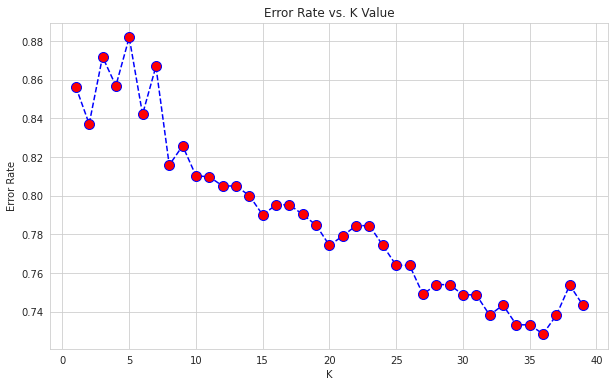

In [132]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

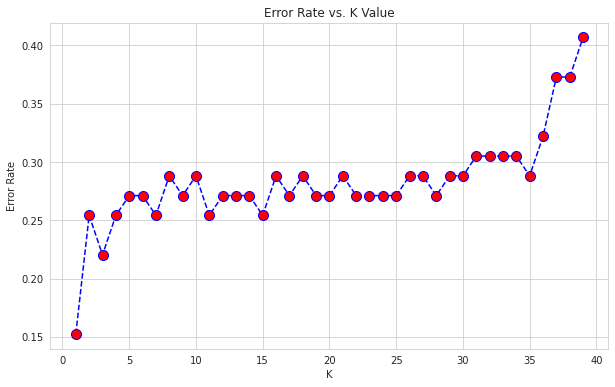

In [133]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [134]:
#Comparison to our original K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print("With K=1")
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


With K=1


[[17  0  0  0  0  0]
 [ 0 21  0  0  0  0]
 [ 2  4  3  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  0  0]
 [ 0  1  0  0  1  6]]


              precision    recall  f1-score   support

           1       0.89      1.00      0.94        17
           2       0.78      1.00      0.88        21
           3       1.00      0.33      0.50         9
           5       1.00      0.75      0.86         4
           6       0.00      0.00      0.00         0
           7       1.00      0.75      0.86         8

    accuracy                           0.85        59
   macro avg       0.78      0.64      0.67        59
weighted avg       0.89      0.85      0.83        59



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [135]:
#Comparison to our original K=9
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print("With K=9")
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


With K=9


[[17  0  0  0  0]
 [ 1 20  0  0  0]
 [ 2  7  0  0  0]
 [ 0  4  0  0  0]
 [ 0  2  0  0  6]]


              precision    recall  f1-score   support

           1       0.85      1.00      0.92        17
           2       0.61      0.95      0.74        21
           3       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         4
           7       1.00      0.75      0.86         8

    accuracy                           0.73        59
   macro avg       0.49      0.54      0.50        59
weighted avg       0.60      0.73      0.64        59



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
